# Notebook 11 - Continuación con Redes Neuronales Multicapa.


## 1. Diseñando nuestra primera CNN

Vaya turra trabajar siempre con el mismo data set de números. ¿Verdad? Pues venga, una última vez. Rápidamente vamos a comprobar si nos aporta alguna mejora trabajar con una Red Neuronal Convolucional en cuestión de rendimiento sobre el dataset de MNIST.

---

**Tu tarea:** Diseña con Keras una Red Neuronal Convolucional y entrénalo  y evalualo con el dataset MNIST aumentado generado en el ejercicio de ayer (ya se proporciona el código para aumentar los datos). Comprueba si esta arquitectura mejora el rendimiento obtenido comparado con el la Red Neuronal Multicapa. Igualmente, compara el número de parámetros (recuerda la función ***model.summary()***) entre las dos arquitecturas.


**Importante:** Recuerda cambiar el Entorno de ejecución en la pestaña "Entorno de ejecución" >  "Cambiar tipo de entorno de ejecución" el "Acelerador por Hardware" de None a GPU, para que el rendimiento de entrenamiento sea superior.

In [0]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb

import matplotlib.pyplot as plt
import numpy.random

from scipy.ndimage import shift
from scipy.ndimage import rotate
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils  import to_categorical

# Cargamos el dataset desde el archivo.
mnist = pd.read_csv("./sample_data/mnist_train_small.csv", header=None).as_matrix()

# Guardamos las variables X e Y.
X, Y = mnist[:, 1:], mnist[:, 0:1]

# Normalizamos input y codificamos output con one-hot encoding.
Xt = X / 255.0
Yt = to_categorical(Y, 10)


def traslate_imgs(X):
  
  # Matriz resultado.
  trasl_X = np.zeros(X.shape)
  
  for ix, x in enumerate(X):
    
    # Convertimos a matriz el vector de píxeles.
    rx = x.reshape(28, 28)
    #r Seleccionamos cuánto vamos a cortar en X e Y.
    shift_x = np.random.randint(14) - 7
    shift_y = np.random.randint(14) - 7
    # Guardamos la traslación de la imagen.
    trasl_X[ix] = shift(x.reshape(28, 28), (shift_x, shift_y)).flatten()
    
  return trasl_X


def rotate_imgs(X):
  
  # Matriz resultado.
  rot_X = np.zeros(X.shape)
  
  for ix, x in enumerate(X):
    
    # Convertimos a matriz el vector de píxeles.
    rx = x.reshape(28, 28)
    # Seleccionamos el ángulo con el que rotar la imagen.
    angle = np.random.randint(180) - 90
    # Guardamos la traslación de la imagen.
    rot_X[ix] = rotate(x.reshape(28, 28), angle, reshape=False).flatten()
    
  return rot_X


def noise_imgs(X, noise_level=0.5):
  
  # Matriz resultado.
  nois_X = np.zeros(X.shape)
  
  for ix, x in enumerate(X):
    
    # Convertimos a matriz el vector de píxeles.
    rx = x.reshape(28, 28)
    # Seleccionamos el ángulo con el que rotar la imagen.
    noise = (np.random.random(x.shape) * 2.0  - 1) * noise_level
    # Guardamos la traslación de la imagen.
    nois_X[ix] = np.clip(x + noise, 0.0, 1.0).flatten()
    
  return nois_X

# Generamos train trasladada.
trasX_train = traslate_imgs(Xt)
# Generamos train rotada.
rotaX_train = rotate_imgs(Xt)
# Generamos train con ruido 50%.
no50X_train = noise_imgs(Xt, 0.5)
# Generamos train con ruido 25%.
no25X_train = noise_imgs(Xt, 0.25)

# Juntamos todos los sets.
augmX_train = np.vstack([Xt, 
                        trasX_train, 
                        rotaX_train, 
                        no50X_train, 
                        no25X_train])

# E incrementamos el vector Y por 5 veces.
augmY_train = np.tile(Yt, (5,1))

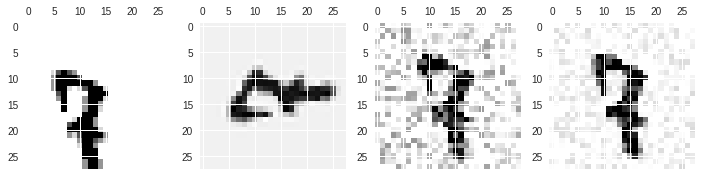

In [0]:
# Visualizamos los datos generados.
idx = 100

fig, axs = plt.subplots(1,4,figsize=(12,12))

axs[0].matshow(trasX_train[idx,:].reshape(28, 28))
axs[1].matshow(rotaX_train[idx,:].reshape(28, 28))
axs[2].matshow(no50X_train[idx,:].reshape(28, 28))
axs[3].matshow(no25X_train[idx,:].reshape(28, 28))

In [0]:
## Importamos Keras API
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten
from tensorflow.python.keras import optimizers

# Generamos train y test set.
X_train, X_test, Y_train, Y_test = train_test_split(augmX_train, augmY_train, train_size=0.7)

### COMIENZA TU CÓDIGO AQUÍ ###

X_train.shape

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(70000, 784)

In [0]:
to_img = lambda array: array.reshape(array.shape[0], 28, 28, 1)
X_train = to_img(X_train)
X_test = to_img(X_test)

In [0]:
model = Sequential()

conv = Conv2D(filters=6, kernel_size=8, strides=1, padding='same', activation='relu')
pool = MaxPooling2D(pool_size=(4, 4), strides=None, padding='valid')

model.add(conv)
model.add(pool)

model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


In [0]:
model.compile(loss='binary_crossentropy',
                optimizer=sgd,
                metrics=['mse', 'accuracy'])

history = model.fit(X_train, Y_train, epochs=3, batch_size=16, validation_data=(X_test, Y_test), verbose=True)

Train on 70000 samples, validate on 30000 samples
Epoch 1/3
70000/70000 [==============================] - 26s 377us/step - loss: 0.1591 - mean_squared_error: 0.0425 - acc: 0.9482 - val_loss: 0.1086 - val_mean_squared_error: 0.0289 - val_acc: 0.9642
Epoch 2/3
70000/70000 [==============================] - 25s 356us/step - loss: 0.0984 - mean_squared_error: 0.0261 - acc: 0.9671 - val_loss: 0.0945 - val_mean_squared_error: 0.0253 - val_acc: 0.9679
Epoch 3/3
70000/70000 [==============================] - 25s 357us/step - loss: 0.0872 - mean_squared_error: 0.0233 - acc: 0.9705 - val_loss: 0.0825 - val_mean_squared_error: 0.0221 - val_acc: 0.9715


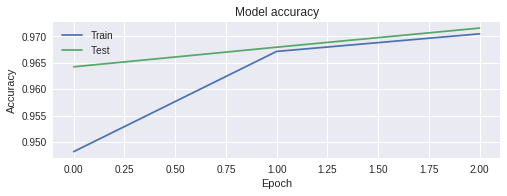

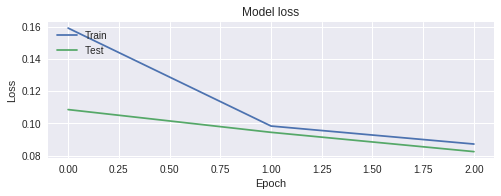

In [0]:
# Plot training & validation accuracy values
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  390       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  2950      
Total params: 3,340
Trainable params: 3,340
Non-trainable params: 0
_________________________________________________________________


Y aquí va un intento de hacer lo contrario, a partir de un número obtener una imagen.

In [0]:
from tensorflow.python.keras.layers import Conv2DTranspose, Reshape

model = Sequential()

filter_max = 128

model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=28 * 28 * filter_max, activation='relu'))
model.add(Reshape((28, 28, filter_max)))
model.add(Conv2DTranspose(filters=filter_max, kernel_size=8, strides=1, padding='same', activation='relu'))
model.add(Conv2DTranspose(filters=8, kernel_size=4, strides=1, padding='same', activation='relu'))
model.add(Conv2DTranspose(filters=1, kernel_size=2, strides=1, padding='same', activation='relu'))


sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [0]:
model.compile(loss='mse',
                optimizer=sgd,
                metrics=['accuracy'])

history = model.fit(Yt[0:128], to_img(Xt)[0:128], epochs=50, batch_size=64, verbose=True)

Epoch 1/50
128/128 [==============================] - 1s 11ms/step - loss: 6.4950 - acc: 0.8118
Epoch 2/50
128/128 [==============================] - 0s 1ms/step - loss: 5.9465 - acc: 0.8118
Epoch 3/50
128/128 [==============================] - 0s 1ms/step - loss: 5.9633 - acc: 0.8118
Epoch 4/50
128/128 [==============================] - 0s 1ms/step - loss: 6.0373 - acc: 0.8118
Epoch 5/50
128/128 [==============================] - 0s 1ms/step - loss: 6.8207 - acc: 0.8118
Epoch 6/50
128/128 [==============================] - 0s 1ms/step - loss: 7.0075 - acc: 0.8118
Epoch 7/50
128/128 [==============================] - 0s 1ms/step - loss: 7.0075 - acc: 0.8118
Epoch 8/50
128/128 [==============================] - 0s 1ms/step - loss: 7.0075 - acc: 0.8118
Epoch 9/50
128/128 [==============================] - 0s 1ms/step - loss: 7.0075 - acc: 0.8118
Epoch 10/50
128/128 [==============================] - 0s 1ms/step - loss: 7.0075 - acc: 0.8118
Epoch 11/50
128/128 [===========================

Pero no funciono muy bien...

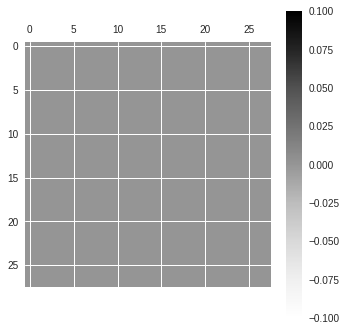

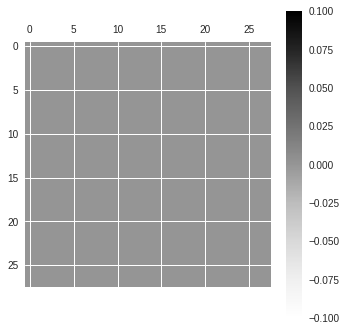

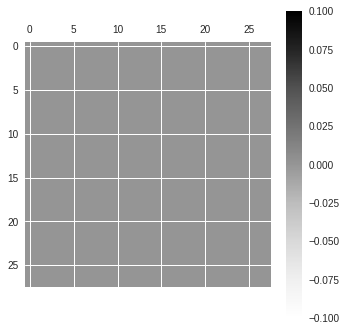

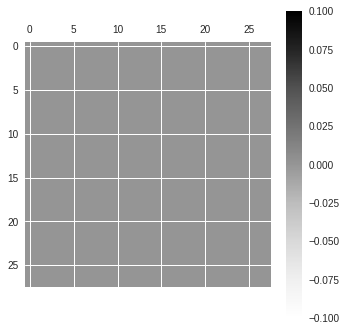

In [0]:
imgs = model.predict(Yt[0:4])

for img in imgs:
  plt.matshow(img.reshape(28,28))
  plt.colorbar()
  plt.show()

In [0]:
imgs = model.predict(Y_train[0:4])

for img in imgs:
  plt.matshow(img.reshape(28,28))
  plt.colorbar()
  plt.show()